# Event Detection Via Social Media Data
----
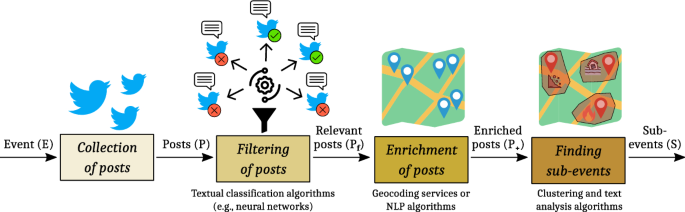

```
[Belcastro, L., Marozzo, F., Talia, D. et al. Using social media for sub-event detection during disasters. J Big Data 8, 79 (2021). https://doi.org/10.1186/s40537-021-00467-1]

```




## Table of Content

1. **Introduction**

   * Overview of the dataset
   * Purpose and objectives

2. **Background**

   * Event detection on Twitter
   * Challenges in creating event detection corpora
   * Importance of this dataset for research

3. **Dataset Overview**

   * Structure of the dataset
   * Key features (tweets, event annotations, etc.)
   * Sample data exploration

4. **Data Preprocessing**

   * Handling missing data
   * Cleaning and filtering data
   * Feature extraction and transformation

5. **Exploratory Data Analysis (EDA)**

   * Distribution of events in the dataset
   * Frequency of tweets by event
   * Top hashtags and entities in events
   * Visualizing tweet data (e.g., word clouds, graphs)

6. **Event Detection in Twitter**

   * Understanding the definition of events
   * Applying basic event detection methods

7. **Data Visualizations**

   * Graphs and plots to visualize relationships between entities, hashtags, and events
   * Network visualizations (e.g., Tweet and user interactions)

8. **Conclusion**

   * Key insights from the data analysis
   * Potential applications of event detection models
   * Next steps in research

9. **References**

   * Academic papers, tools, and methodologies used

## Introduction

##Data Loading

In [ ]:
#@title Fix Dependency Issue
# Uninstall potentially conflicting versions first
# !pip uninstall -y numpy scipy gensim fasttext bertopic laserembeddings sentence-transformers

# !pip install numpy==1.26.4 scipy=
# !pip install gensim
# !pip install fasttext
# !pip install laserembeddings
!pip install bertopic
!pip install sentence-transformers


In [ ]:
#@title Install Packages
# !pip install arabic-reshaper python-bidi
# !pip install ar_wordcloud
# !pip install transformers
# # !pip install stanza --quiet
# !pip install -U bertopic
# !pip install -U sentence-transformers
# !pip install -U scikit-learn
# !pip install -U arabert

# import nltk
# # import stanza

# nltk.download('stopwords')
# from nltk.corpus import stopwords

# arabic_stopwords = set(stopwords.words('arabic'))

# english_stopwords = set(stopwords.words('english'))
# combined_stopwords = arabic_stopwords.union(english_stopwords)

# # Download Arabic model once
# # stanza.download('ar', verbose=False)

# # Initialize pipeline for Arabic with NER
# # nlp = stanza.Pipeline('ar', processors='tokenize,ner', use_gpu=True)


In [ ]:
#@title import packages
import numpy as np
import requests
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import re
import ast

# For reproducibility
np.random.seed(42)

import pandas as pd
#@title import packages
import numpy as np
import requests
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import random
# import arabic_reshaper
# from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from collections import Counter

import matplotlib.pyplot as plt
# import arabic_reshaper
# from bidi.algorithm import get_display
from collections import Counter
import ast
# import arabic_reshaper
# from bidi.algorithm import get_display
# from ar_wordcloud import ArabicWordCloud

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import random
import networkx as nx


In [ ]:
#@title uitlities
import re

def clean_tweet(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)            # remove URLs
    text = re.sub(r'@\w+', '', text)                # remove mentions
    text = re.sub(r'#\w+', '', text)                # remove hashtags
    text = re.sub(r'[^ء-يa-zA-Z0-9\s]', ' ', text) # keep Arabic letters, Latin letters, numbers, and spaces only
    text = re.sub(r'\s+', ' ', text)                 # remove extra whitespace
    return text.strip()

def extract_entities_stanza(text):
    if not isinstance(text, str) or text.strip() == "":
        return []
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities




In [ ]:
# @title Define Constants
urls = [
    "https://raw.githubusercontent.com/HasanKhadd0ur/SocialED_datasets/main/npy_data/Event2012.npy"
]
from google.colab import drive
drive.mount('/content/drive')

columns=[ 'tweet_id', 'text', 'event_id', 'words', 'filtered_words', 'entities', 'user_id', 'created_at', 'urls', 'hashtags', 'user_mentions']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title process data
# import os
# import pandas as pd

# # Define folder path in your Drive
# folder_path = '/content/drive/MyDrive/Events'

# # List CSV files only
# csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
# dataframes = []

# for label, filename in enumerate(csv_files):
#     file_path = os.path.join(folder_path, filename)
#     try:
#         df = pd.read_csv(file_path)
#         df['event_label'] = label  # Numeric label for each file
#         df['event_filename'] = filename  # Optional: store filename
#         dataframes.append(df)
#     except Exception as e:
#         print(f"Error reading {filename}: {e}")
# merged_df = pd.concat(dataframes, ignore_index=True)

# # Optional: Save to Drive or download
# merged_df.to_csv('/content/drive/MyDrive/merged_labeled_events.csv', index=False)

In [ ]:
#@title Load dataset
df = pd.read_csv("/content/drive/MyDrive/merged_labeled_events.csv")

In [ ]:
#@title Data Columns
df.columns

Index(['Tweet ID', 'Tweet Text', 'Type', 'Author Name', 'Author Username',
       'Creation Time', 'Reply Count', 'Retweet Count', 'Quote Count',
       'Like Count', 'View Count', 'Bookmark Count', 'Language',
       'Possibly Sensitive', 'Source', 'Hashtags', 'Tweet URL', 'Media Type',
       'Media URLs', 'External URLs', 'event_label', 'event_filename',
       'Hashtags_str', 'Old Tweet Text', 'Named Entities', 'Date', 'date'],
      dtype='object')

In [ ]:
# @title Ensure Type
# Ensure datetime format
df['Creation Time'] = pd.to_datetime(df['Creation Time'])
# Extract just the date part
df['date'] = df['Creation Time'].dt.date

import ast

def entities_to_list(entities_str):
    if isinstance(entities_str, str):
        try:
            # Safely evaluate the string to a Python list
            entities = ast.literal_eval(entities_str)
            # Ensure it's a list and strip whitespace from each entity
            if isinstance(entities, list):
                return [e.strip() for e in entities]
            else:
                return []
        except (ValueError, SyntaxError):
            return []
    else:
        return []

# Apply to the Named Entities column
df['Named Entities'] = df['Named Entities'].apply(entities_to_list)



In [ ]:
#@title Ensure hashtags are stored as lists instead of comma-separated strings
# def convert_hashtags_to_list(value):
#     if isinstance(value, str):
#         return [tag.strip() for tag in value.split(',') if tag.strip()]
#     return []

# df['Hashtags'] = df['Hashtags'].apply(convert_hashtags_to_list)
# Convert the string of hashtags separated by commas into a list, handling NaN

def hashtags_to_list(hstring):
    if isinstance(hstring, str):
        # Split by comma, strip whitespace
      return [tag.strip().lstrip('#') for tag in hstring.split(',') if tag.strip()]

    else:
        # For NaN or missing values
        return []
df['Hashtags_str'] = df['Hashtags']

# Apply conversion to your hashtag column, e.g., 'Hashtags_str'
df['Hashtags'] = df['Hashtags'].apply(hashtags_to_list)



In [ ]:
# @title Data shape
print(df.shape)


(6642, 27)


In [ ]:
#@title Clean the tweet texts
df['Old Tweet Text'] = df['Tweet Text']
df['Tweet Text'] = df['Tweet Text'].apply(clean_tweet)


## BERTopic, With ARABERT Embedding

In [ ]:
# @title Install  Arabert and BERTopic
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Use Arabic sentence transformer model
embedding_model = SentenceTransformer("aubmindlab/bert-base-arabertv2")

# Create and fit BERTopic model
topic_model = BERTopic(embedding_model=embedding_model, language="arabic")



In [ ]:
#@title Embeddding the Tweets
tweets = df['Tweet Text'].tolist()
embeddings = embedding_model.encode(tweets, show_progress_bar=True)


Batches:   0%|          | 0/208 [00:00<?, ?it/s]

In [ ]:
#@title Save the Embedding
# Convert to DataFrame
embedding_df = pd.DataFrame(embeddings)

# Save
embedding_df.to_csv("tweet_embeddings.csv", index=False)


In [ ]:
#@title Fit the model the tweets
# tweets = df["Tweet Text"].tolist()
topics, probs = topic_model.fit_transform(tweets,embeddings)



In [ ]:
#@title View topics
topic_info = topic_model.get_topic_info()
print(topic_info.head())



   Topic  Count                         Name  \
0     -1   2167              -1_من_في_عن_على   
1      0    240               0_عم_ما_يلي_بس   
2      1    210    1_بويضاني_عصام_كوهين_ايلي   
3      2    210  2_مجلس_العقوبات_ترامب_مندوب   
4      3    203  3_الطفلة_آية_بلوق_الزبلطاني   

                                      Representation  \
0  [من, في, عن, على, سوريا, لا, العقوبات, السورية...   
1     [عم, ما, يلي, بس, ياخور, مو, رح, شو, انو, حدا]   
2  [بويضاني, عصام, كوهين, ايلي, قضية, تجاهل, باسم...   
3  [مجلس, العقوبات, ترامب, مندوب, سوريا, الأمريكي...   
4  [الطفلة, آية, بلوق, الزبلطاني, العثور, أيام, س...   

                                 Representative_Docs  
0  [الاعتداء من قبل مجموعة مسلحة على محافظ الدكتو...  
1  [ما رح قلك قديشك سخيف على هالخبر بس رح قلك الح...  
2  [ماهو سبب تجاهل قضية عصام بويضاني هل تم بيعه ل...  
3  [المندوب الصيني في مجلس الأمن على المجتمع الدو...  
4  [العثور على الطفلة آية بلوق مقتولة في سوق الها...  


In [ ]:
#@title Exclude the outlier topic -1
n_topics = len(set(topic_model.get_topics().keys())) - (1 if -1 in topic_model.get_topics() else 0)

print(f"Total number of topics (excluding outliers): {n_topics}")


Total number of topics (excluding outliers): 109


In [ ]:
#@title Topic Coherence
# from gensim.models.coherencemodel import CoherenceModel
# from gensim.corpora import Dictionary

# # Get topic words
# topics = topic_model.get_topics()
# top_words = [[word for word, _ in topic] for topic in topics.values()]

# # Prepare corpus and dictionary
# texts = [doc.split() for doc in tweets]
# dictionary = Dictionary(texts)
# corpus = [dictionary.doc2bow(text) for text in texts]

# # Compute coherence score
# coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
# coherence_score = coherence_model.get_coherence()
# print(f"Topic Coherence Score (c_v): {coherence_score:.4f}")


In [ ]:
# @title  visualize topics
topic_model.visualize_barchart(top_n_topics=10)


In [ ]:
#@title Inter Topic Distance
topic_model.visualize_topics()


In [ ]:
#@title Similarity Heat Map
topic_model.visualize_heatmap()


In [ ]:
#@title Topics  Over Time
topics_over_time = topic_model.topics_over_time(tweets, df['date'].tolist(), topics)
topic_model.visualize_topics_over_time(topics_over_time)

## BERTopic, With LASER Embedding

In [ ]:
# @title Install  mbert and BERTopic
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Use Arabic sentence transformer model
embedding_model = SentenceTransformer("sentence-transformers/LaBSE")

# Create and fit BERTopic model
topic_model = BERTopic(embedding_model=embedding_model, language="arabic")



modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [ ]:
#@title Embeddding the Tweets
tweets = df['Tweet Text'].tolist()
embeddings = embedding_model.encode(tweets, show_progress_bar=True)


Batches:   0%|          | 0/208 [00:00<?, ?it/s]

In [ ]:
#@title fit the model

topics, probs = topic_model.fit_transform(tweets, embeddings)

print(f"Number of topics: {len(set(topics))}")


Number of topics: 126


In [ ]:
#@title View topics
topic_info = topic_model.get_topic_info()
print(topic_info.head())



   Topic  Count                           Name  \
0     -1   1527             -1_من_سوريا_في_على   
1      0    315       0_تركيا_سوريا_او_الجولان   
2      1    201    1_الطفلة_آية_بلوق_الزبلطاني   
3      2    198  2_مصطفى_محافظ_السويداء_البكور   
4      3    156      3_كوهين_ايلي_إيلي_الجاسوس   

                                      Representation  \
0  [من, سوريا, في, على, العقوبات, عن, لا, ما, رفع...   
1  [تركيا, سوريا, او, الجولان, ما, من, لا, القنيط...   
2  [الطفلة, آية, بلوق, الزبلطاني, العثور, سنوات, ...   
3  [مصطفى, محافظ, السويداء, البكور, بكور, المحافظ...   
4  [كوهين, ايلي, إيلي, الجاسوس, إسرائيل, وثائق, أ...   

                                 Representative_Docs  
0  [وزير الخارجية السوري أسعد الشيباني يلتقي في د...  
1  [تركيا هل تقسيم سوريا يخدمها لا تقسيم سوريا لا...  
2  [فيديو يوثق لحظة اختطاف الطفلة آية بلوق ثلاث س...  
3  [استقالة محافظ السويداء مصطفى بكور, استقالة مح...  
4  [رويترز الشرع سل م أرشيف الجاسوس إيلي كوهين لـ...  


In [ ]:
#@title Exclude the outlier topic -1
n_topics = len(set(topic_model.get_topics().keys())) - (1 if -1 in topic_model.get_topics() else 0)

print(f"Total number of topics (excluding outliers): {n_topics}")


Total number of topics (excluding outliers): 125


In [ ]:
# @title  visualize topics
topic_model.visualize_barchart(top_n_topics=10)


In [ ]:
#@title Inter Topic Distance
topic_model.visualize_topics()


In [ ]:
#@title Similarity Heat Map
topic_model.visualize_heatmap()


In [ ]:
#@title Topics  Over Time
topics_over_time = topic_model.topics_over_time(tweets, df['date'].tolist(), topics)
topic_model.visualize_topics_over_time(topics_over_time)

In [68]:
from sklearn.metrics import normalized_mutual_info_score


predicted_labels, _ = topic_model.transform(tweets)  # predicted_labels is a list of cluster ids for each doc

# Now calculate NMI:
true_labels = df['event_label'].tolist()
nmi_score = normalized_mutual_info_score(true_labels, predicted_labels)

print("NMI score:", nmi_score)


NMI score: 0.6375832056963175


## Conclusion

In [ ]:
#@title Save the dataset
df.to_csv('/content/drive/MyDrive/cleaned_merged_labeled_events.csv', index=False)
df.to_csv('/content/drive/MyDrive/merged_labeled_events.csv', index=False)


## Refrences
